In [1]:
import os, sys
from utils import FeatureCollection, RBins
import cfg as c

%pylab
%matplotlib inline
%load_ext autoreload
%autoreload 2

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
rbs = RBins(c.LON, c.LAT, c.ROT * np.pi / 180, c.GRID_SIZE, dia_fac=c.DIAF)

print rbs.trf_mat, rbs.x0, rbs.y0

assert rbs.inv_trans(0, 0) == (c.LON, c.LAT)
assert rbs.trans(c.LON, c.LAT) == (0, 0)

# Testing
for x, y in [(0, 1), (100, 100), (0, 0), (112, 23), (1, 0)]:
    xp, yp = rbs.trans(*rbs.inv_trans(x, y))
    assert np.isclose(xp, x) and np.isclose(yp, y), (x, y, xp, yp)

fc = FeatureCollection()
for i in range(c.XSIZE):
    for j in range(c.YSIZE):
        fc.add_polygon(rbs.get_poly(i, j), {})
fc.dump('test.geojson')

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-2-c148fb905f16>, line 3)

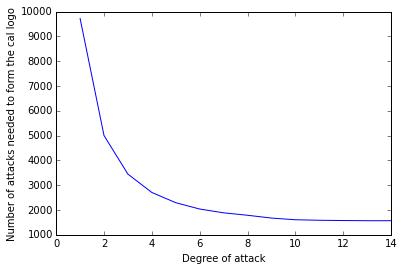

In [4]:
x = range(1, 15)
y = [9720, 5001, 3446, 2707, 2295, 2039, 1886, 1788, 1675, 1607, 1586, 1575, 1568, 1568]

plt.xlabel('Degree of attack')
plt.ylabel('Number of attacks needed to form the cal logo')
plt.plot(x, y)